In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display

import my_module

mpl.style.use("default")

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

In [3]:
df_acc, df_care = my_module.read_data(8)

In [4]:
print(df_acc.shape, df_acc.isnull().sum(), df_acc.duplicated().sum())
df_acc = df_acc.drop_duplicates()
df_acc.head()

(5112531, 5) subject_id    0
datetime      0
x             0
y             0
z             0
dtype: int64 4675647


,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707


In [5]:
df_acc = my_module.convert_datetime(df_acc, ["datetime"])
df_acc = df_acc.sort_values(["datetime"])

In [7]:
# fig, axes = plt.subplots(3, 1, figsize=(20, 15))
# colors = ["orange", "green", "blue"]
# columns = ["x", "y", "z"]
# for i in range(3):
#     df_acc.plot(x="datetime", y=columns[i], ax=axes[i], color=colors[i]);
# plt.savefig("../output.png")

## DataPreprocessing

In [8]:
number = 14
df_acc, df_care = my_module.read_data(number)
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_acc = my_module.convert_datetime(df_acc, ["datetime"])

In [9]:
display(df_care.head()), display(df_acc.head())

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,298,14,26,休憩,3,11053,2018-02-03 13:09:22+09:00,2018-02-03 13:09:22+09:00,2018-02-03-13.0
1,15619,14,6,処置,75,51430,2018-05-12 07:15:36+09:00,2018-05-12 07:17:16+09:00,2018-05-12-7.0
2,15620,14,6,処置,85,51431,2018-05-12 07:15:37+09:00,2018-05-12 07:17:17+09:00,2018-05-12-7.0
3,15621,14,6,処置,79,51432,2018-05-12 07:15:38+09:00,2018-05-12 07:17:19+09:00,2018-05-12-7.0
4,15622,14,6,処置,88,51433,2018-05-12 07:15:40+09:00,2018-05-12 07:17:27+09:00,2018-05-12-7.0


,subject_id,datetime,x,y,z
0,14,2018-06-18 19:17:48.673000+09:00,-8.887,-0.651,1.118
1,14,2018-06-18 17:31:38.830000+09:00,-8.887,-0.498,1.248
2,14,2018-06-22 17:20:29.678000+09:00,-8.887,-0.498,-1.025
3,14,2018-06-18 16:51:08.292000+09:00,-8.887,-0.651,1.282
4,14,2018-06-18 17:54:50.492000+09:00,-8.887,-0.612,1.296


(None, None)

In [11]:
# from scipy.interpolate import interp1d
# from datetime import datetime, timedelta
# import math
# import matplotlib.dates as mdates


# dt = timedelta(seconds=1)  # 時間間隔
# t = [datetime.fromtimestamp(i.astype(datetime) * 1e-9) for i in df_acc["datetime"].values]
# x = df_acc["x"]


# # 補間用の時刻列作成。
# # ここでは元の時間間隔の半分の時刻列を作る
# dt_new = dt/2
# num_new = len(t)
# t_new = [t[0] + x * dt_new for x in range(num_new)]

# # interp関数はdatetime型を受け付けない
# # 時刻をdatetime型からunix時間（float）に変換する
# t_unix = [x.timestamp() for x in t]
# t_new_unix = [x.timestamp() for x in t_new]

# # # 方法1: numpy で補間
# x_numpy = np.interp(t_new_unix, t_unix, x)

# # 方法2: scipy で補間
# # 補間方法選択
# kind = "linear", "nearest", "zero", "slinear", "quadratic", "cubic", "previous", "next"
# kind = "cubic"
# f = interp1d(t_unix, x, kind="linear", bounds_error=False)
# x_scipy = f(t_new_unix)


# fig, axes = plt.subplots(3, 1, figsize=(18, 10))
# axes[0].plot(t, x, marker="^")
# axes[1].plot(t_new, x_numpy, marker="o");
# axes[2].plot(t_new, x_scipy, marker="o");

In [12]:
# import datetime 
# from dateutil import tz

# JST = tz.gettz("Asia/Tokyo")

# start_date = datetime.datetime(2018, 6, 28, microsecond=0, tzinfo=JST)
# finish_date = datetime.datetime(2018, 4, 30, microsecond=0, tzinfo=JST)
# display(df_care[(df_care["finish"] <= finish_date)])
# df_care_series = df_care[(df_care["finish"] <= finish_date) & (df_care["start"] >= start_date)]
# display(df_care_series)
# start_date = df_care_series["start"]
# finish_date = df_care_series["finish"]
# print(start_date, finish_date)
# df_acc[(df_acc["datetime"] < finish_date)]

## 全データ

In [13]:
from glob import glob
from tqdm import tqdm
df_care = pd.DataFrame()
for path in tqdm(glob("../data/Care Record Data/*")):
    tmp = pd.read_csv(path)
    df_care = pd.concat([df_care, tmp])

df_acc = pd.DataFrame()
for path in tqdm(glob("../data/Accelerometer Data/*")):
    tmp = pd.read_csv(path)
    df_acc = pd.concat([df_acc, tmp])

100%|██████████| 5/5 [00:30<00:00,  6.12s/it]


In [14]:
# drop missing and duplicated data
df_care.dropna(inplace=True)
df_acc.drop_duplicates(inplace=True)

# datetimeごとにsort
df_care.sort_values("start", inplace=True)
df_acc.sort_values("datetime", inplace=True)

In [15]:
# str convert to datetime
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_acc = my_module.convert_datetime(df_acc, ["datetime"])

# add time_length columns
df_care = my_module.add_timeLength_timeLengthSeconds(df_care)

In [16]:
display(df_care.head()), display(df_acc.head());

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,time_length,time_length_seconds
3371,179,14,18,申し送り・ミーティング,3,14624,2018-02-02 09:47:16+09:00,2018-02-02 09:47:21+09:00,2018-02-02-9.0,0 days 00:00:05,5.0
3294,187,14,10,日中利用者対応,35,12354,2018-02-02 11:12:03+09:00,2018-02-02 11:09:40+09:00,2018-02-02-11.0,-1 days +23:57:37,-143.0
712,189,14,17,手書き記録,31,11803,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0
714,189,14,17,手書き記録,35,11805,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0
715,189,14,17,手書き記録,36,11806,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0


,subject_id,datetime,x,y,z
2568947,14,2018-04-01 22:04:11.988000+09:00,-1.187,0.000,-9.747
3635596,14,2018-04-01 22:04:12.177000+09:00,-1.034,0.000,-9.746
183208,14,2018-04-01 22:04:12.378000+09:00,-1.072,-0.038,-9.746
1444612,14,2018-04-01 22:04:12.383000+09:00,-1.072,-0.038,-9.746
195451,14,2018-04-01 22:04:12.577000+09:00,-1.034,-0.076,-9.747


In [ ]:
df_care.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len]).reset_index().pivot('user_id', 'activity_type_id','len').fillna(0)

activity_type_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,120.0,918.0,112.0,825.0,107.0,0.0,85.0,32.0,74.0,49.0,142.0,432.0,4.0,3.0,0.0,12.0,47.0,43.0,209.0,85.0,9.0,11.0,2.0,35.0,0.0,0.0,2.0,1.0
13,85.0,556.0,2.0,411.0,35.0,0.0,27.0,1.0,85.0,232.0,80.0,518.0,11.0,12.0,2.0,25.0,8.0,2.0,42.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0
14,126.0,650.0,14.0,483.0,1.0,11.0,25.0,0.0,43.0,46.0,58.0,1741.0,17.0,14.0,1.0,80.0,26.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15,51.0,268.0,2.0,21.0,3.0,0.0,23.0,0.0,17.0,3.0,27.0,528.0,7.0,1.0,1.0,20.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
25,2.0,38.0,0.0,33.0,0.0,239.0,2.0,8.0,9.0,97.0,10.0,137.0,4.0,0.0,0.0,9.0,15.0,40.0,0.0,0.0,0.0,22.0,23.0,28.0,6.0,25.0,1.0,1.0


## OutputFigures

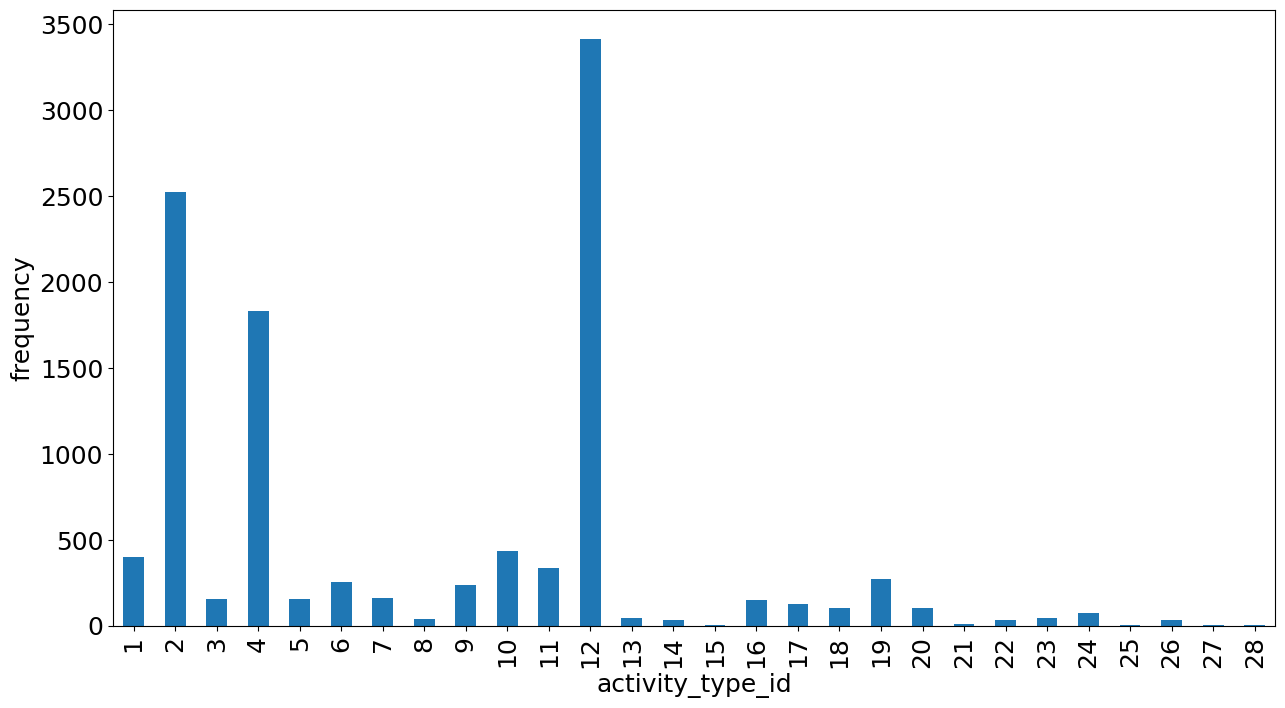

In [ ]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_care.groupby(["activity_type_id"]).count()["id"].plot(kind="bar", ax=ax);
ax.set_ylabel("frequency", fontsize=18)
ax.set_xlabel("activity_type_id", fontsize=18)
fig.savefig("../results/activity_frequency.png")

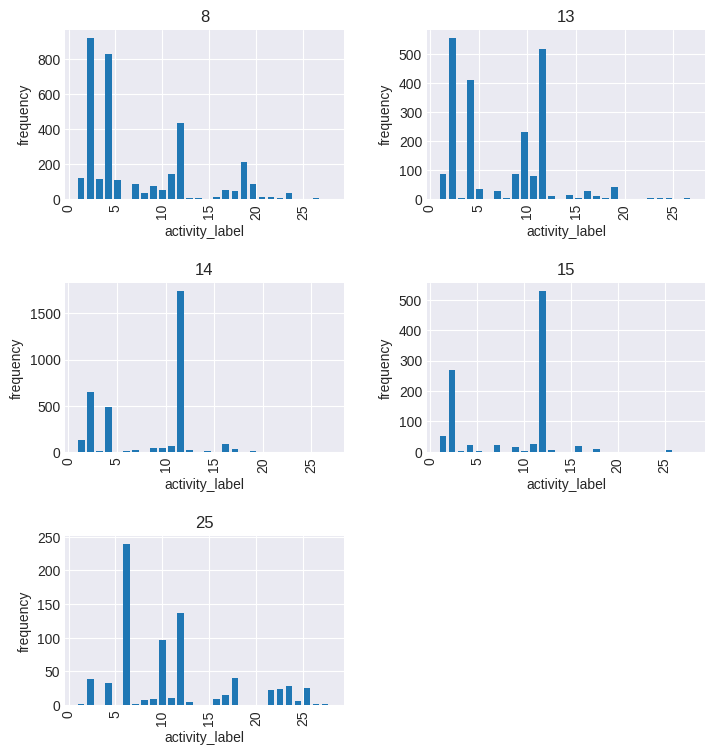

In [ ]:
mpl.style.use("seaborn-darkgrid")
axes = df_care.hist(by='user_id', column='activity_type_id', bins=28, width=0.7, figsize=(8, 9), align="mid")

# set xlabel
axes[0][0].set_xlabel("activity_label")
axes[0][1].set_xlabel("activity_label")
axes[1][0].set_xlabel("activity_label")
axes[1][1].set_xlabel("activity_label")
axes[2][0].set_xlabel("activity_label")

# set ylabel
axes[0][0].set_ylabel("frequency")
axes[0][1].set_ylabel("frequency")
axes[1][0].set_ylabel("frequency")
axes[1][1].set_ylabel("frequency")
axes[2][0].set_ylabel("frequency")

plt.savefig("../results/activity_label_each_user.png")

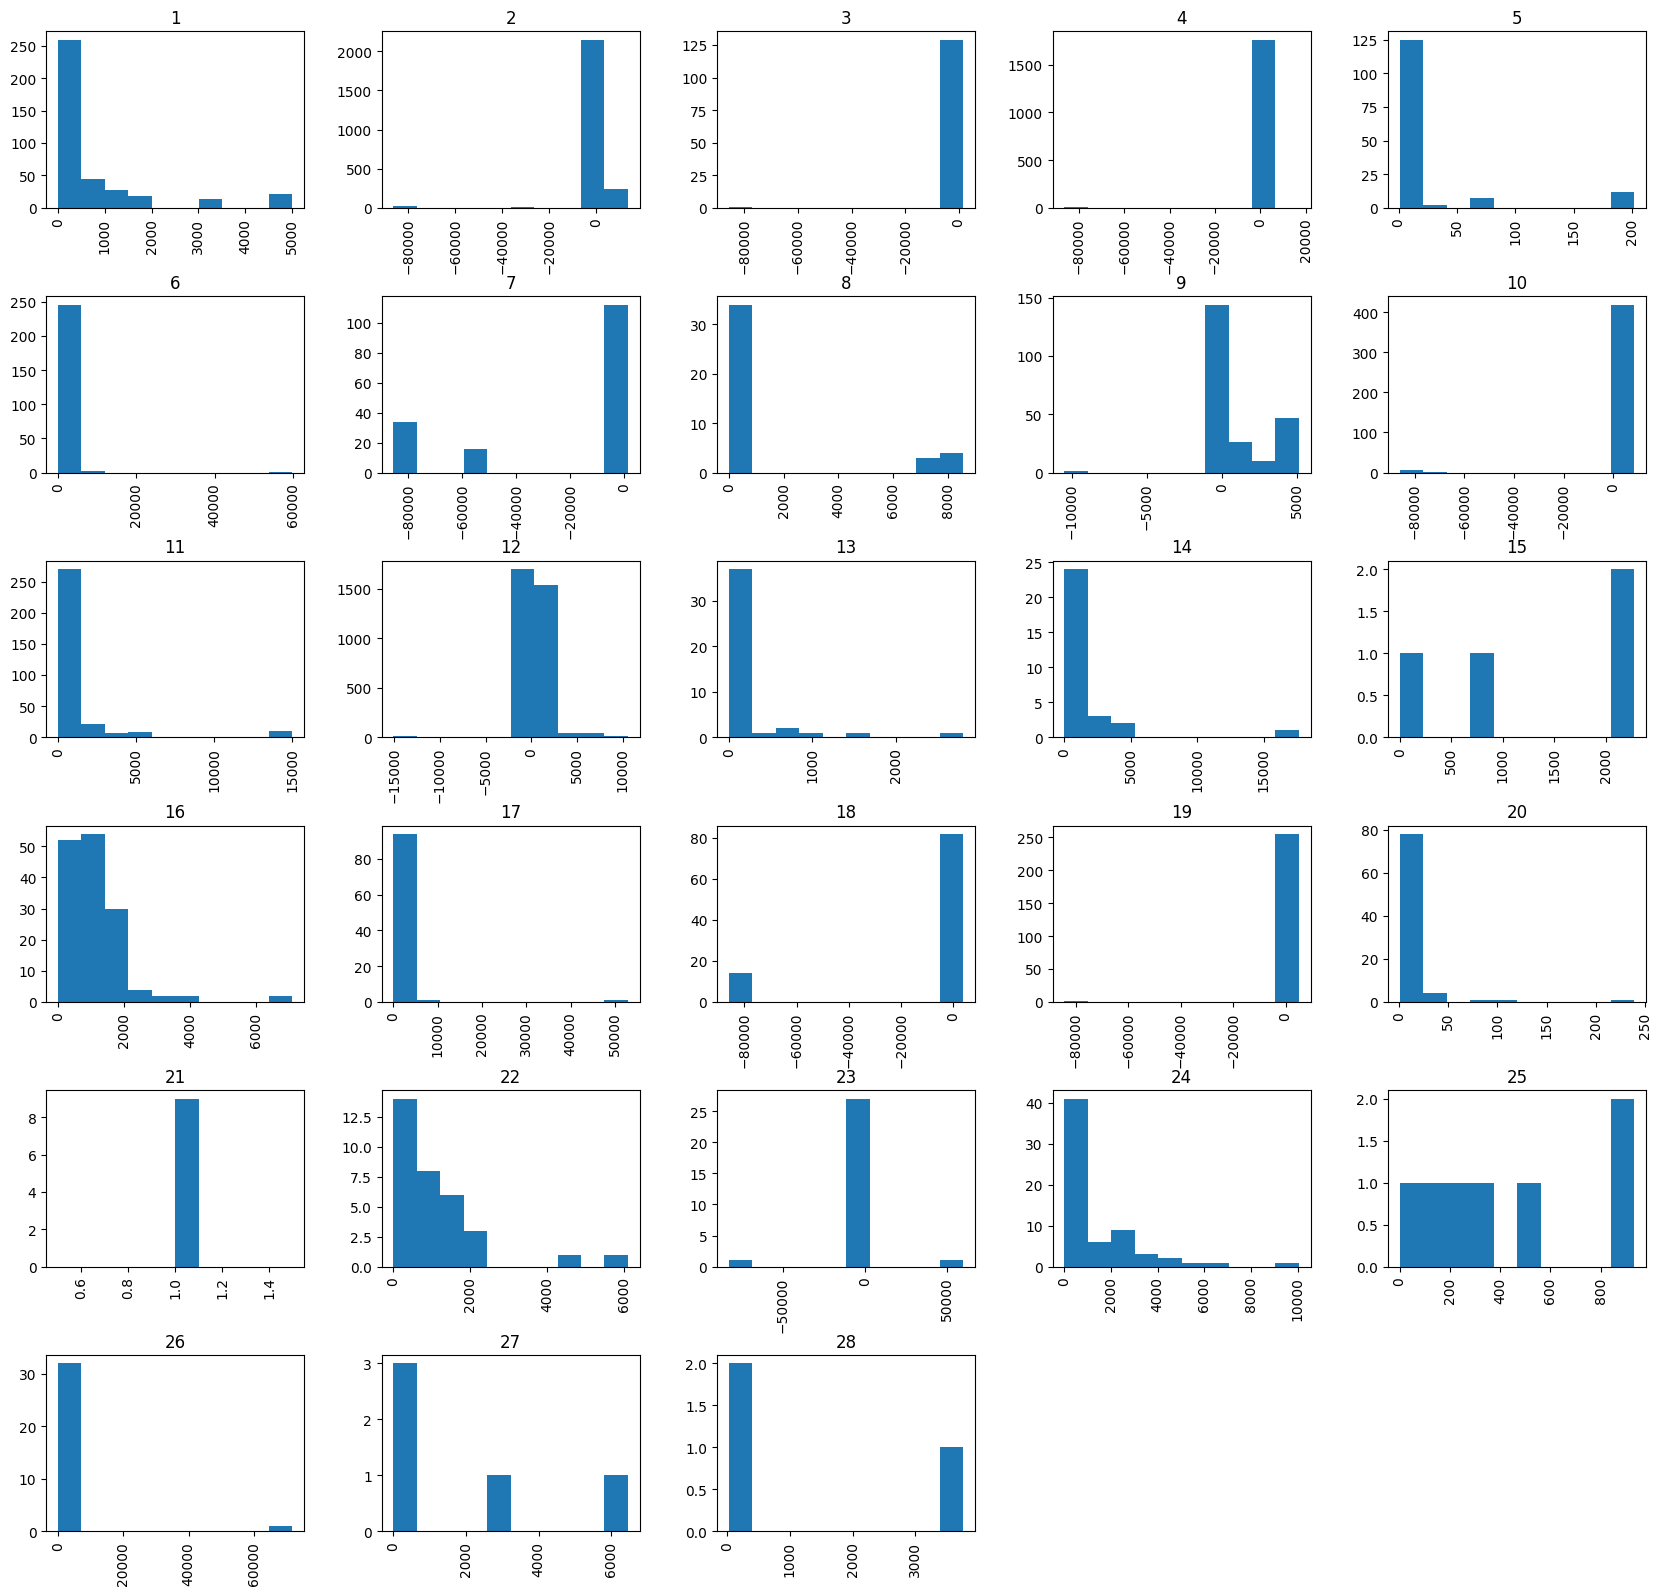

In [ ]:
# df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20));
# plt.savefig("../results/time_length_each_activity.png")

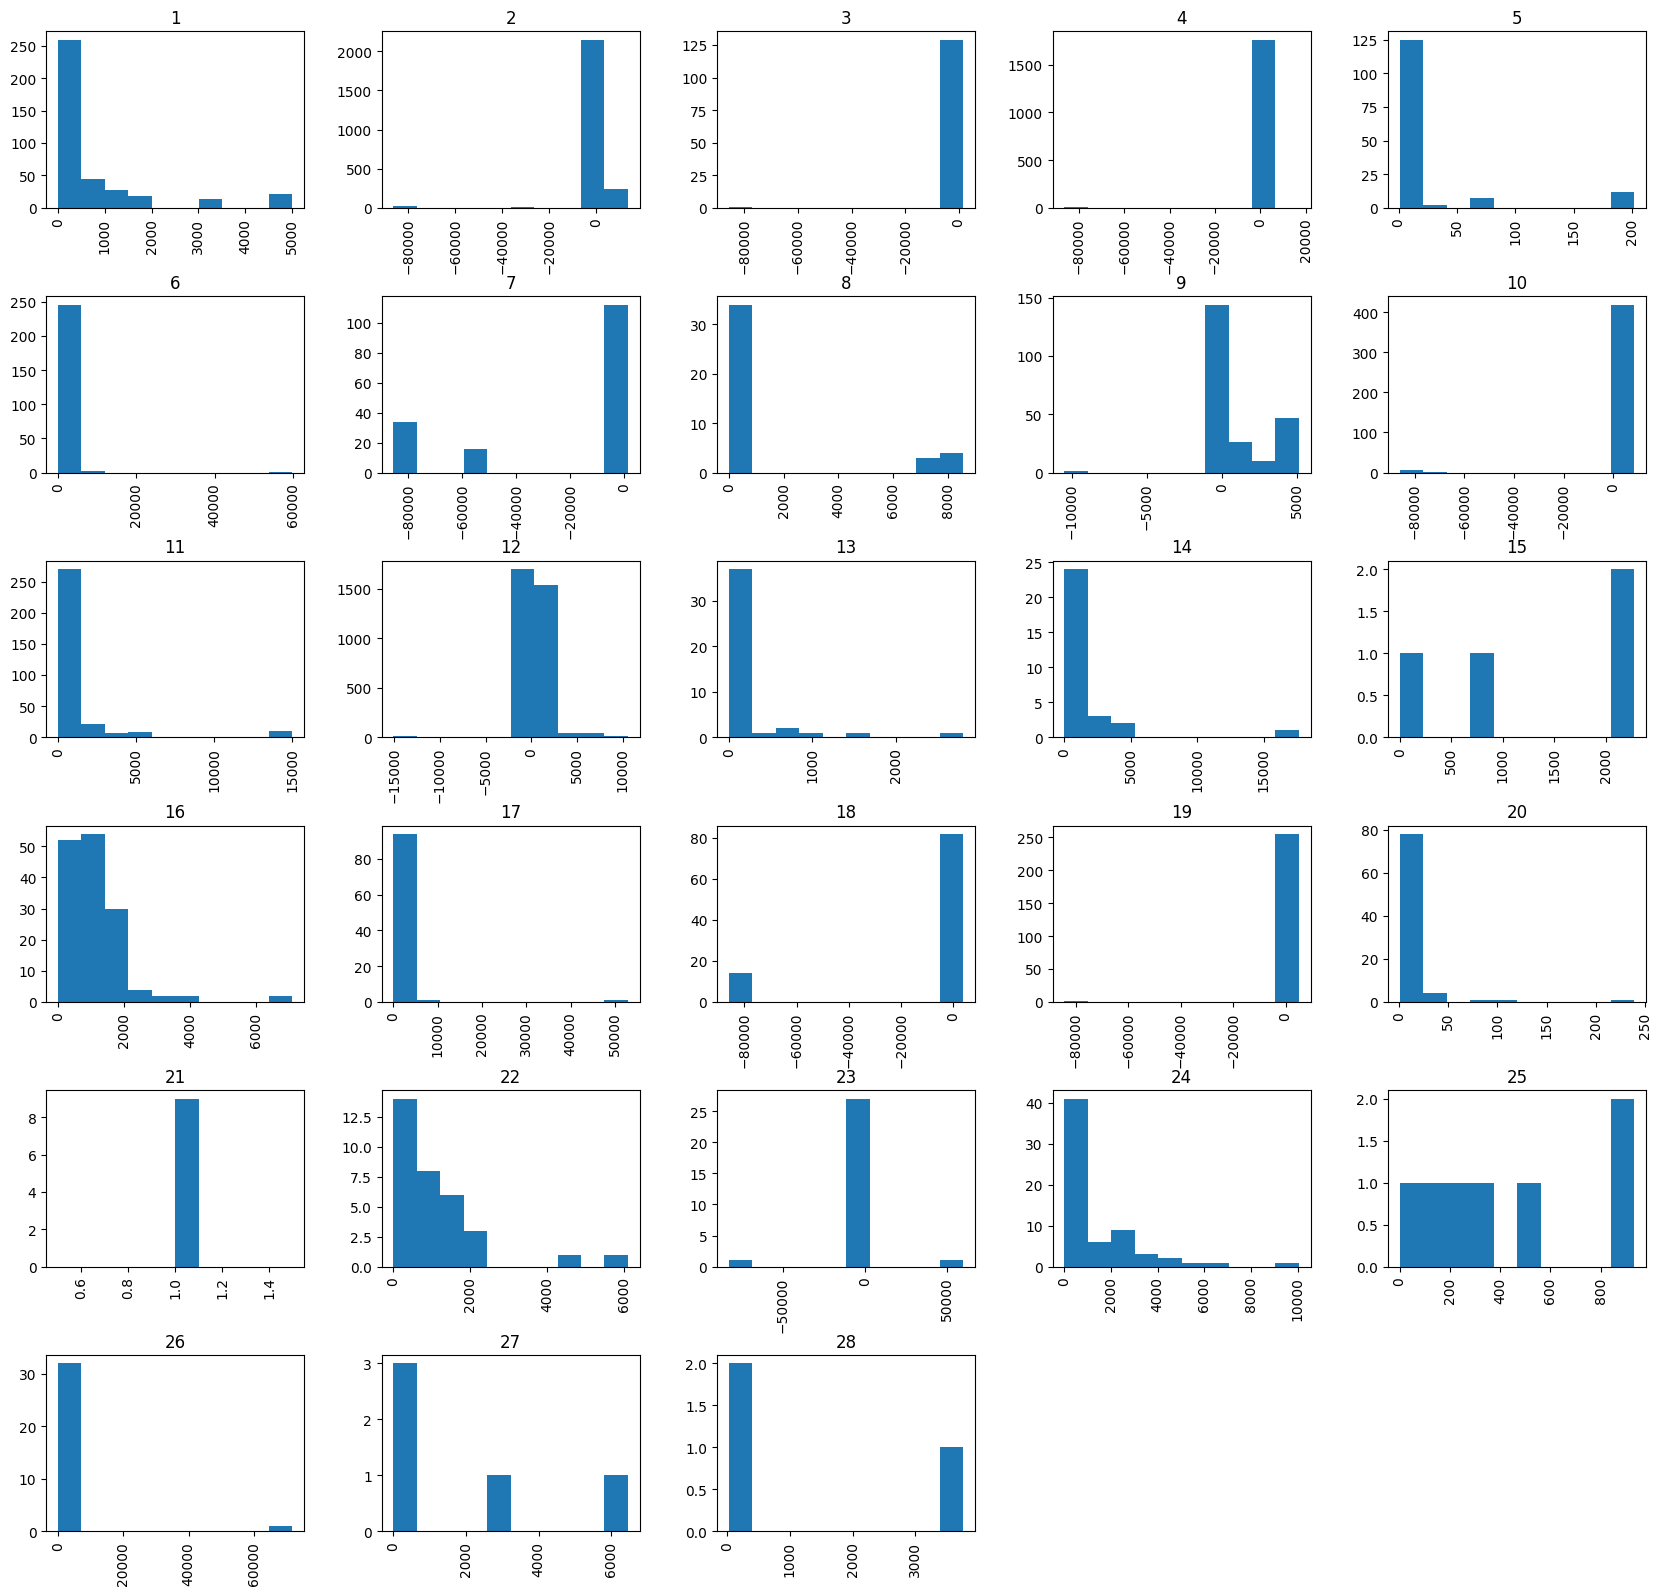

In [ ]:
# df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20));
# plt.savefig("../results/activity_time_length.jpg")

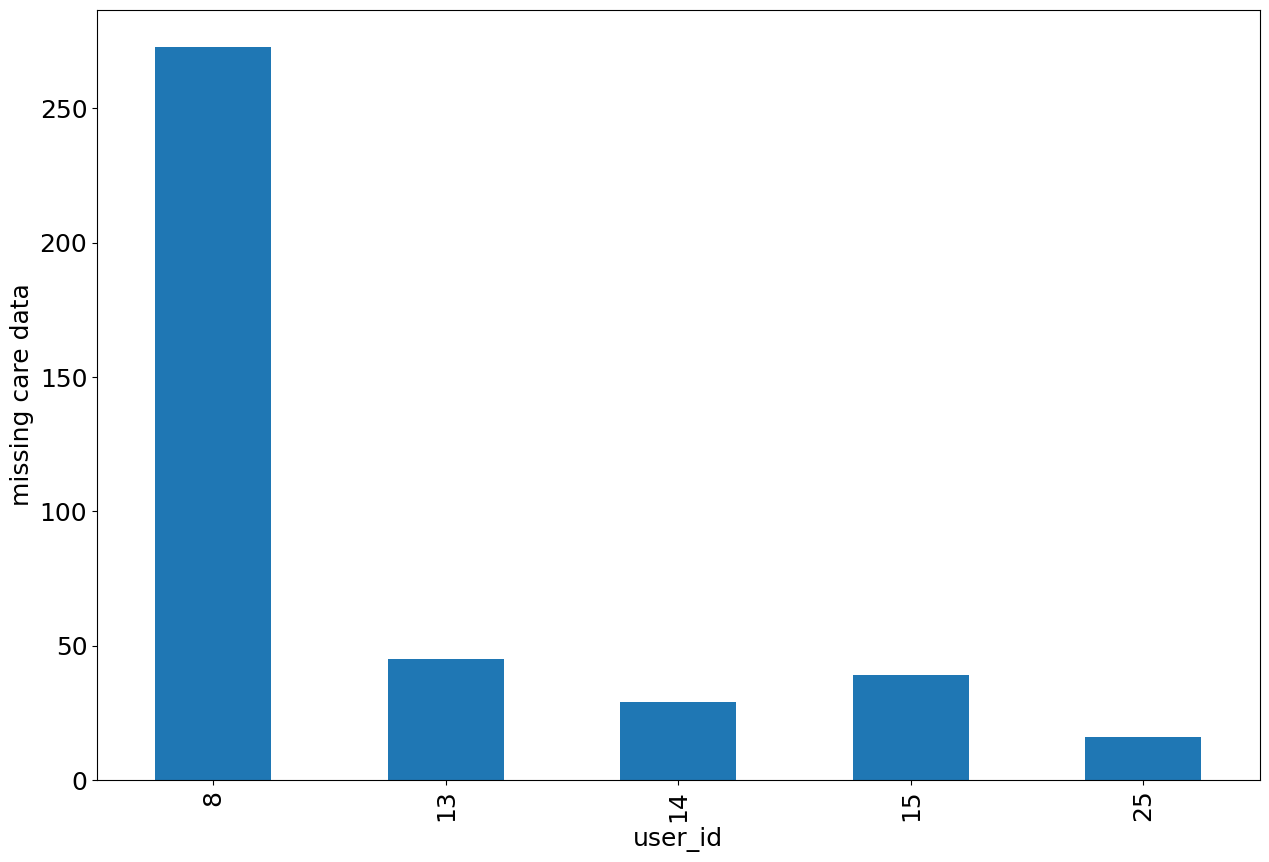

In [ ]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_care.groupby(["user_id"])["finish"].apply(lambda x: x.isnull().sum()).plot(kind="bar", ax=ax)
ax.set_ylabel("missing care data", fontsize=18)
ax.set_xlabel("user_id", fontsize=18)
plt.savefig("../results/missing_data.png")

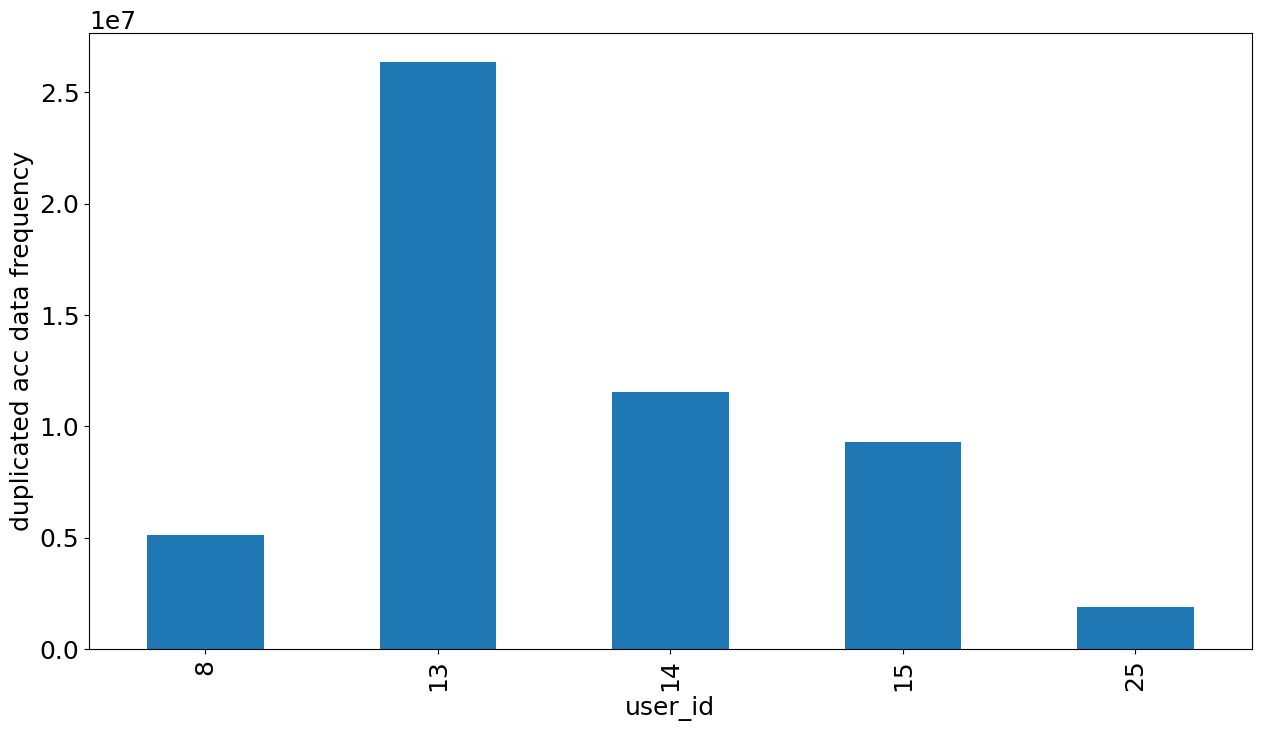

In [ ]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_acc.groupby(["subject_id"])["x"].apply(lambda x: x.duplicated().sum()).plot(kind="bar", ax=ax)
ax.set_xlabel("user_id", fontsize=18)
ax.set_ylabel("duplicated acc data frequency", fontsize=18)
plt.savefig("../results/acc_duplicated_data.png")

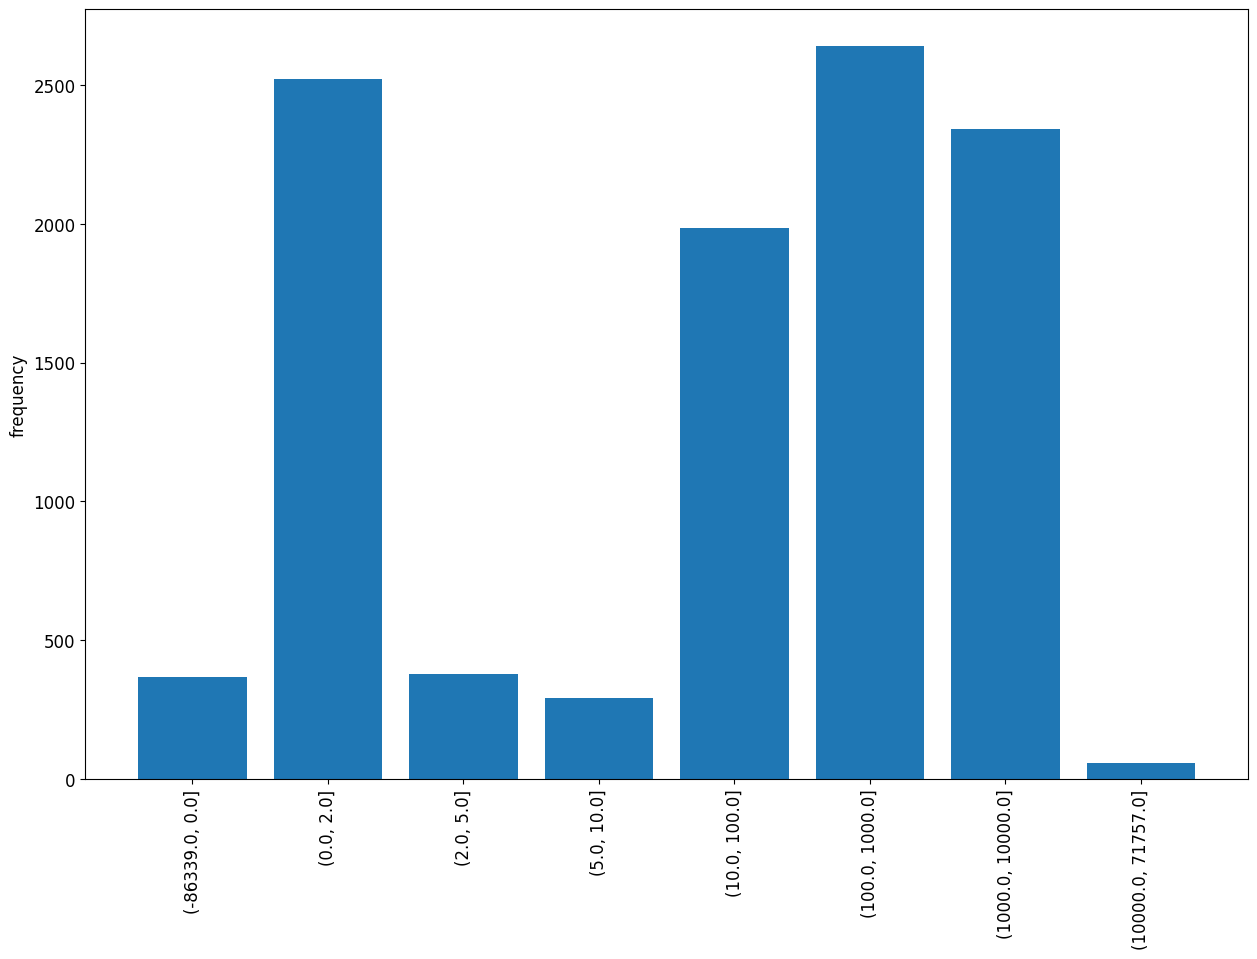

In [ ]:
# s_cut = pd.cut(df_care["time_length_seconds"], [min(df_care["time_length_seconds"]), 0, 2, 5, 10, 100, 1000, 10000, max(df_care["time_length_seconds"])])
# data = s_cut.value_counts().sort_index()
# mpl.style.use("default")
# plt.figure(figsize=(15, 10))
# data = s_cut.value_counts().sort_index()
# plt.xticks(rotation=90, fontsize=12)
# plt.yticks(fontsize=12)
# plt.ylabel("frequency", size=12)
# plt.bar(data.index.astype(str), data);
# plt.savefig("../results/time_length_frequencty.png")

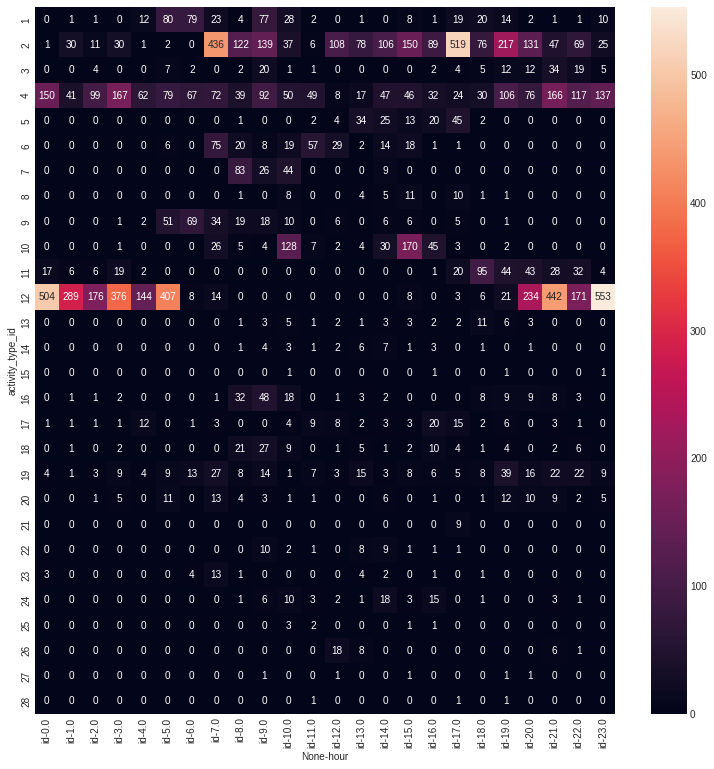

In [19]:
mpl.style.use("seaborn-darkgrid")
df_care["hour"] = df_care["year-month-date-hour"].str.split("-", expand=True).iloc[:, -1].astype(float)
corr = df_care.groupby(["activity_type_id", "hour"]).count().iloc[:, 0].reset_index().sort_values(["activity_type_id", "hour"]).pivot("activity_type_id", "hour").fillna(0).astype(int)
plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, fmt='d');

In [17]:
# 各userごとのラベルが与えられている日数
df_care["date"] = df_care["year-month-date-hour"].str.rsplit(pat="-", expand=True, n=1).iloc[:, 0]
tmp = df_care[df_care["start"] >= pd.Timestamp("2018-04-01T00:00:00.000+09:00")]
tmp.groupby(["user_id", "date"]).size().reset_index().groupby(["user_id"])["date"].count()

user_id
8     39
13    28
14    36
15    25
25    40
Name: date, dtype: int64

In [20]:
# 各ユーザーごとのactivity時間の総和
df_care[df_care["time_length_seconds"] > 0].groupby(["user_id"])["time_length_seconds"].sum()

user_id
8      146180.0
13    2672012.0
14    3368812.0
15    1016855.0
25    1216818.0
Name: time_length_seconds, dtype: float64

<AxesSubplot:xlabel='activity_type_id'>

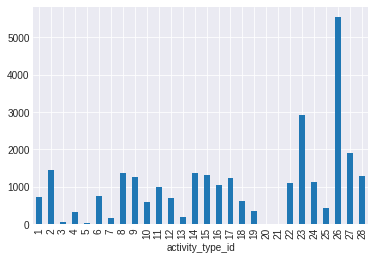

In [24]:
# 各activityの平均時間
df_care[df_care["time_length_seconds"] > 0].groupby(["activity_type_id"])["time_length_seconds"].mean().plot(kind="bar")